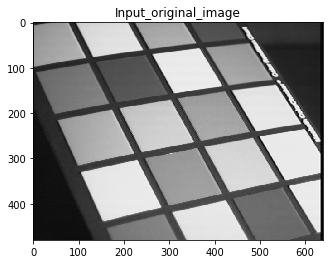

original_image (480, 640)
image_after_zero_padding.shape (482, 642)
image_after_filter.shape (482, 642)
(480, 640)
original_image (480, 640)
image_after_zero_padding.shape (482, 642)
image_after_filter.shape (482, 642)
(480, 640)


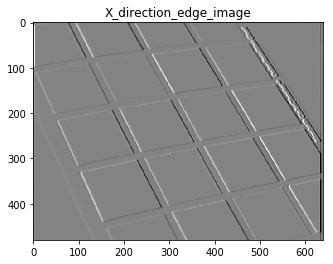

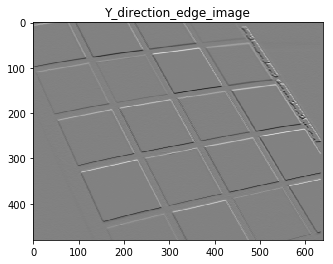

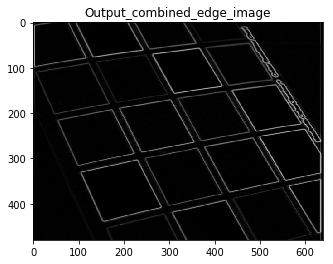

In [73]:
import re
import numpy as np
import matplotlib.pyplot as plt
import math
#from matplotlib import pyplot
%matplotlib inline

# read pgm file
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return numpy.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=58
                            ).reshape((int(height), int(width)))



def plot_image(image, title_of_the_image='hough_simple_1 original image'):
    plt.imshow(image, cmap='gray')
    plt.title(title_of_the_image)
    plt.savefig("/Users/jimmy/Dropbox/001 Courses/2016 fall/CV/assignment/hw3/"+input_gray_level_image_name[:-4]+title_of_the_image+'.png')
    plt.show()

def zero_padding(input_array):
    #insert zeros to the first column and first row
    output_array=np.insert(input_array, 0, values=0, axis=1)
    output_array=np.insert(output_array, 0, values=0, axis=0)
    z = np.zeros((len(output_array[:,0]),1))
    output_array= np.append(output_array, z, axis=1)
    z = np.zeros((1, len(output_array[0,:])))
    output_array= np.append(output_array, z, axis=0)
    #print(output_array)
    return output_array

def un_zero_padding(input_array):
    p=scipy.delete(input_array, 0, 1)
    p=scipy.delete(p, -1, 1)
    p=scipy.delete(p, 0, 0)
    p=scipy.delete(p, -1, 0)
    return p

    
    
def some_filter(original_image, filter):
    #zero padding is used for the boundary
    #here the image is the image_after_zero_padding
    print("original_image",original_image.shape)
    image=zero_padding(original_image)
    print("image_after_zero_padding.shape",image.shape)
    image_after_filter = np.zeros(image.shape)
    print("image_after_filter.shape",image_after_filter.shape)
    for i in range (len(image[:,0])-2):
        for j in range(len(image[0,:])-2):
            image_after_filter[i+1][j+1]=image[i][j]*filter[0][0]+image[i][j+1]*filter[0][1]+image[i][j+2]*filter[0][2]+image[i+1][j]*filter[1][0]+image[i+1][j+1]*filter[1][1]+image[i+1][j+2]*filter[1][2]+image[i+2][j]*filter[2][0]+image[i+2][j+1]*filter[2][1]+image[i+2][j+2]*filter[2][2]
    image_after_filter=un_zero_padding(image_after_filter)
    print(image_after_filter.shape)
    return image_after_filter


def combine_x_y_edge_image(x, y):
    """This function is used to combine the x direction edge image
    and the y direction image.
    The formular used here is sqrt(x^2+y^2)"""
    com_output = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            com_output[i,j]=math.sqrt(x[i,j]**2+y[i,j]**2)
    return com_output
        
        
        
    
def h1(input_gray_level_image_name,sigma_value=10):
    """This function is used to resolve the programming homework h1. It is used 
    to do the edge detection based on the sobel filter."""
    input_gray_level_image = read_pgm(input_gray_level_image_name)
    plot_image(input_gray_level_image, 'Input_original_image')
    
    # sobel filter is used here to detect the edge 
    #x-direction kernel
    
    x_direction_sobel_kernel=np.array([[-1, 0 ,1],[-2, 0 ,2],[-1, 0 ,1]])
    y_direction_sobel_kernel=np.array([[-1, -2 ,-1],[0, 0 ,0],[1, 2 ,1]])
    x_direction_edge= some_filter(input_gray_level_image, x_direction_sobel_kernel)
    y_direction_edge= some_filter(input_gray_level_image, y_direction_sobel_kernel)
    output_gray_level_edge_image = combine_x_y_edge_image(x_direction_edge,y_direction_edge)
    
    plot_image(x_direction_edge,'X_direction_edge_image')
    plot_image(y_direction_edge,'Y_direction_edge_image')
    plot_image(output_gray_level_edge_image,'Output_combined_edge_image')
    return output_gray_level_edge_image
    

if __name__ == '__main__':
    # Get the input gray level image based on the file name
    input_gray_level_image_name = "hough_simple_1.pgm"
    """
    This is related to the h1 of the assignment 3 of the computer vision course
    Output_gray_level_edge_image is the out put image
    The input grey level image is the input
    """
    output_gray_level_edge_image = h1(input_gray_level_image_name)
   
    
    

In [13]:
import numpy as np
def some_filter(image, some_filter):
    #zero padding is used for the boundary

    
test_image = np.arange(1, 10).reshape((3, 3))
x_direction_sobel_kernel=np.array([[-1, 0 ,1],[-2, 0 ,2],[-1, 0 ,1]])
y_direction_sobel_kernel=np.array([[-1, -2 ,-1],[0, 0 ,0],[1, 2 ,1]])
print(type(x_direction_sobel_kernel))
print(x_direction_sobel_kernel)
print(test_image)
out_put_image=some_filter(test_image,x_direction_sobel_kernel )
print(out_put_image)
    

<class 'numpy.ndarray'>
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [60]:
import scipy
import math
def zero_padding(input_array):
    #insert zeros to the first column and first row
    output_array=np.insert(input_array, 0, values=0, axis=1)
    output_array=np.insert(output_array, 0, values=0, axis=0)
    z = np.zeros((len(output_array[:,0]),1))
    output_array= np.append(output_array, z, axis=1)
    z = np.zeros((1, len(output_array[0,:])))
    output_array= np.append(output_array, z, axis=0)
    #print(output_array)
    return output_array

x_direction_sobel_kernel=np.array([[-1, 0 ,1],[-2, 0 ,2],[-1, 0 ,1]])
print(x_direction_sobel_kernel)

p = np.insert(x_direction_sobel_kernel, 0, values=0, axis=1) # insert values before column 2
print(p)
p = np.insert(p, 0, values=0, axis=0) # insert values before column 2
print(p)
z = np.zeros((len(p[:,0]),1))
p= np.append(p, z, axis=1)
print(p)
z = np.zeros((1, len(p[0,:])))
p= np.append(p, z, axis=0)
print(p)
print(p[1:-1])

p=scipy.delete(p, 0, 1)
p=scipy.delete(p, -1, 1)
print(p.shape)
print(p.shape[0])
print(p[0,0])


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[ 0 -1  0  1]
 [ 0 -2  0  2]
 [ 0 -1  0  1]]
[[ 0  0  0  0]
 [ 0 -1  0  1]
 [ 0 -2  0  2]
 [ 0 -1  0  1]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -2.  0.  2.  0.]
 [ 0. -1.  0.  1.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -2.  0.  2.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0. -1.  0.  1.  0.]
 [ 0. -2.  0.  2.  0.]
 [ 0. -1.  0.  1.  0.]]
(5, 3)
5
0.0


In [63]:
import math
print(math.sqrt(4))

2.0


In [69]:
input_gray_level_image_name = "hough_simple_1.pgm"
print(input_gray_level_image_name[:-4])

hough_simple_1
